In [1]:
#importing libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pytesseract
import enum

In [2]:
# Enum class defining operating systems (Mac and Windows) for configuration purposes
class OS(enum.Enum): 
    Mac = 0
    Windows = 1

In [3]:
# Enum class defining language codes (ENG, RUS, ITA, DEU) for use in OCR language settings
class Language(enum.Enum): 
    ENG = 'eng'
    RUS = 'rus'
    ITA = 'ita'
    DEU = 'deu'

In [4]:
# ImageReader class to handle configuration based on the operating system (Mac or Windows)
class ImageReader:
    def __init__(self, os: OS):
        if os == OS.Mac:
            print('Running on: MAC\n')
        if os == OS.Windows:
            windows_path = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
            pytesseract.pytesseract.tesseract_cmd = windows_path
            print('Running on: Windows\n')

In [5]:
# Load image
img = np.array(Image.open('test_imgs/test_img_3.png'))

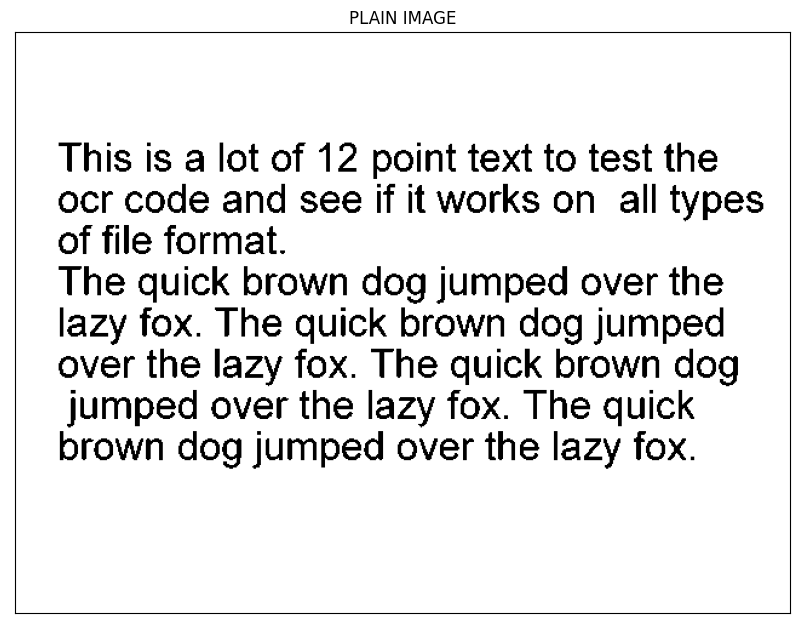

In [6]:
plt.figure(figsize=(10, 10))
plt.title('PLAIN IMAGE')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
# Perform OCR on plain image with psm and oem parameters
text = pytesseract.image_to_string(img, config='--psm 12 --oem 1')  # Adjust psm and oem values as needed
print(text)

This is a lot of 12 point text to test the

ocr code and see if it works on all types

of file format.

The quick brown dog jumped over the

lazy fox. The quick brown dog jumped

over the lazy fox. The quick brown dog

jumped over the lazy fox. The quick

brown dog jumped over the lazy fox.



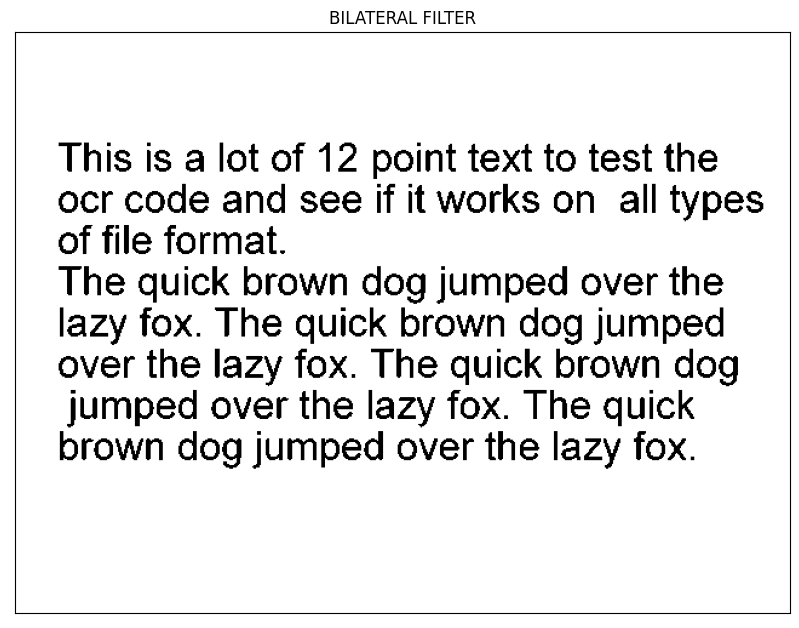

In [8]:
# Apply bilateral filter
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
img = cv2.bilateralFilter(img, 5, 55, 60)

# Display image after bilateral filter
plt.figure(figsize=(10, 10))
plt.title('BILATERAL FILTER')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

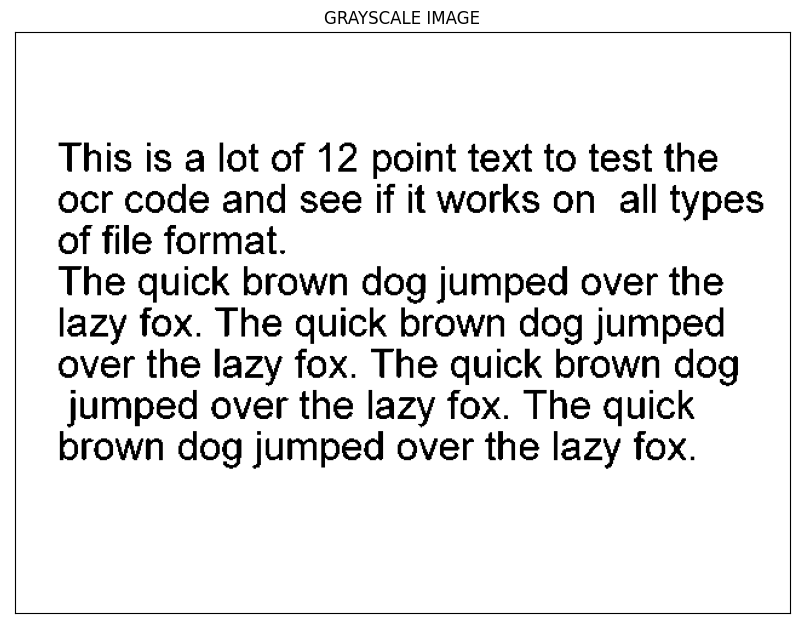

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display grayscale image
plt.figure(figsize=(10, 10))
plt.title('GRAYSCALE IMAGE')
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

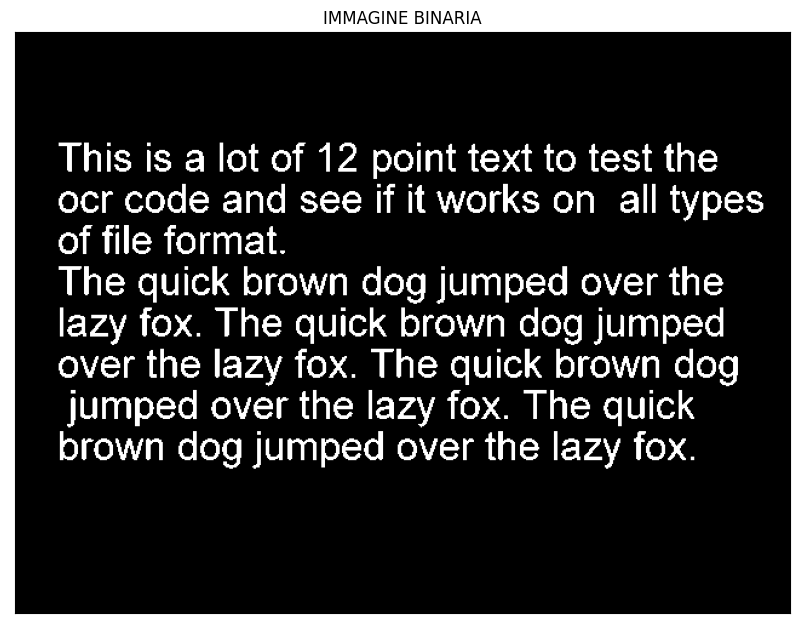

This is a lot of 12 point text to test the

ocr code and see if it works on all types

of file format.

The quick brown dog jumped over the

lazy fox. The quick brown dog jumped

over the lazy fox. The quick brown dog

jumped over the lazy fox. The quick

brown dog jumped over the lazy fox.



In [10]:
# Binarize image
_, img = cv2.threshold(img, 240, 255, 1)

# Display binary image
plt.figure(figsize=(10, 10))
plt.title('IMMAGINE BINARIA')
plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
text = pytesseract.image_to_string(img, config='--psm 12 --oem 1')  # Adjust psm and oem values as needed
print(text)

In [11]:
def preprocess_finale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img = cv2.bilateralFilter(img, 5, 55, 60)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 240, 255, 1)
    return img

# Load image again for preprocessing
img = np.array(Image.open('test_imgs/test_img_3.png'))

# Preprocess image using the correct function name
img = preprocess_finale(img)

# Perform OCR on preprocessed image with psm and oem parameters
text = pytesseract.image_to_string(img, lang='eng', config='--psm 12 --oem 1')  # Adjust psm and oem values as needed
print(text)

This is a lot of 12 point text to test the

ocr code and see if it works on all types

of file format.

The quick brown dog jumped over the

lazy fox. The quick brown dog jumped

over the lazy fox. The quick brown dog

jumped over the lazy fox. The quick

brown dog jumped over the lazy fox.

